In [173]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU

In [174]:
df = pd.read_csv('./data/tcs_train.csv')
df.dropna(inplace=True)

In [175]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-21,1209.969971,1225.000000,1203.430054,1223.199951,1098.629028,1610104.0
1,2015-12-22,1220.000000,1220.000000,1200.000000,1202.530029,1080.064209,1560858.0
2,2015-12-23,1207.500000,1217.500000,1205.280029,1212.900024,1089.378174,849834.0
3,2015-12-24,1210.500000,1219.099976,1202.000000,1217.119995,1093.168457,843160.0
4,2015-12-28,1214.000000,1233.199951,1210.099976,1231.349976,1105.948730,3704198.0


In [176]:
df.shape

(983, 7)

#### Data Preprocessing

In [177]:
df_train = df.iloc[:, 1:2].values
#df_train

In [178]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
df_train_sc = sc.fit_transform(df_train)

In [179]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 983):
    X_train.append(df_train_sc[i-60:i, 0])
    y_train.append(df_train_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [180]:
X_train.shape,y_train.shape

((923, 60), (923,))

In [181]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [182]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [183]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
923/923 [==============================] - 4s 5ms/step - loss: 0.0502
Epoch 2/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0085
Epoch 3/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0072
Epoch 4/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0070
Epoch 5/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0067
Epoch 6/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0064
Epoch 7/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0060
Epoch 8/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 9/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 10/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0061
Epoch 11/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0053
Epoch 12/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 13/100


923/923 [==============================] - 3s 3ms/step - loss: 0.0018
Epoch 100/100
923/923 [==============================] - 3s 3ms/step - loss: 0.0019


#### Making the predictions and visualising the results

In [184]:
# Getting the real stock price of 2017
df_test = pd.read_csv('./data/tcs_test.csv')
df_test.head()
df_test.shape

(10, 7)

In [185]:
real_stock_price = df_test.iloc[:, 1:2].values

In [186]:
# Getting the predicted stock price 
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [187]:
X_test = []
for i in range(60, 70):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [188]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

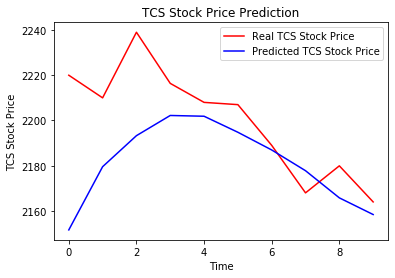

In [189]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()